#📌 Extracão

In [2]:
github_json_url = 'https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/TelecomX_Data.json'

#🔧 Transformação

In [3]:
import requests
import pandas as pd
import json

try:
    # Faz a requisição HTTP para a API
    response = requests.get(github_json_url)

    # Verifica se a requisição foi bem sucedida (código 200)
    response.raise_for_status() # Lança um erro para status de erro HTTP

    # Carrega o conteúdo JSON da resposta para um objeto Python
    # Muitos objetos de resposta de requests já vêm com um método .json()
    # que faz json.loads() internamente.
    dados_api = response.json()

    print("Dados da API carregados com sucesso!")
    print(f"Tipo dos dados brutos: {type(dados_api)}")

    # Converter os dados para um DataFrame do Pandas
    # Se 'dados_api' for uma lista de dicionários (muito comum em APIs),
    # o Pandas consegue criar um DataFrame diretamente.
    df = pd.DataFrame(dados_api)

    print("\nDados convertidos para DataFrame do Pandas:")
    print(df.head()) # Mostra as primeiras 5 linhas do DataFrame
    print(f"\nDimensões do DataFrame: {df.shape}")
    print(f"Colunas do DataFrame: {df.columns.tolist()}")

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a API: {e}")
except json.JSONDecodeError as e:
    print(f"Erro ao decodificar a resposta JSON da API: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

# Agora você tem seus dados no DataFrame 'df' e pode começar a manipulá-los!

Dados da API carregados com sucesso!
Tipo dos dados brutos: <class 'list'>

Dados convertidos para DataFrame do Pandas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...  

In [ ]:
import pandas as pd
import requests
import json

# --- PASSO 1: Recarregar os dados (apenas para garantir que temos o df) ---
# SUBSTITUA PELA SUA URL DA API
api_url = 'https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/TelecomX_Data.json' # Exemplo de API pública

try:
    response = requests.get(api_url)
    response.raise_for_status()
    dados_api = response.json()
    df = pd.DataFrame(dados_api)
    print("DataFrame carregado com sucesso!\n")
except Exception as e:
    print(f"Erro ao carregar o DataFrame: {e}")
    # Se der erro aqui, o restante do código não vai funcionar, então saímos.
    exit()

# --- PASSO 2: Explorar as colunas e tipos de dados de forma mais segura ---
print("--- Visão Geral do DataFrame ---")
print(df.info())

print("\n--- Primeiras 5 linhas do DataFrame ---")
print(df.head())

print("\n--- Verificando valores únicos em colunas (com tratamento para dicionários/listas) ---")
for column in df.columns:
    # Verifica o tipo de dados da primeira entrada (se houver) para evitar o erro.
    # Pode ser que a coluna inteira seja de dicionários/listas, ou apenas alguns elementos.
    # O foco aqui é identificar o problema.
    first_non_null = df[column].dropna().iloc[0] if not df[column].dropna().empty else None

    if isinstance(first_non_null, (dict, list)):
        print(f"Coluna '{column}': Contém dicionários ou listas. Não é possível usar .unique() ou .nunique() diretamente. Exemplo: {first_non_null}")
    elif df[column].nunique() < 20: # Condição original para colunas com poucos valores únicos
        print(f"Coluna '{column}' (tipo {df[column].dtype}): {df[column].unique()}")
    else:
        # Para colunas com muitos valores únicos (mais de 20), apenas o número de únicos
        # é mais informativo do que listar todos eles.
        print(f"Coluna '{column}' (tipo {df[column].dtype}): Mais de 20 valores únicos. Total: {df[column].nunique()} únicos.")

print("\n--- Estatísticas Descritivas para Colunas Numéricas ---")
print(df.describe())

DataFrame carregado com sucesso!

--- Visão Geral do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

--- Primeiras 5 linhas do DataFrame ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'Senior

In [ ]:
# Supondo que 'df' é o seu DataFrame
print("--- Primeiras 5 linhas do DataFrame ---")
print(df.head())

print("\n--- Últimas 5 linhas do DataFrame ---")
print(df.tail())

--- Primeiras 5 linhas do DataFrame ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService':

In [ ]:
print("--- Verificando a Contagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum()) # Conta o número de NaNs por coluna

print("\n--- Verificando a Porcentagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum() / len(df) * 100) # Mostra a porcentagem de NaNs

--- Verificando a Contagem de Valores Ausentes por Coluna ---
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

--- Verificando a Porcentagem de Valores Ausentes por Coluna ---
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [ ]:
if 'customerID' in df.columns:
    # Contar o número total de IDs
    total_ids = len(df['customerID'])

    # Contar o número de IDs únicos
    unique_ids = df['customerID'].nunique()

    # Calcular o número de IDs repetidos
    # Se total_ids > unique_ids, significa que há repetições
    repeated_ids_count = total_ids - unique_ids

    print(f"--- Verificando Duplicatas na Coluna 'customerId' ---")
    print(f"Total de registros na coluna 'CustumerId': {total_ids}")
    print(f"Número de IDs únicos: {unique_ids}")
    print(f"Número de IDs repetidos (não únicos): {repeated_ids_count}")

    if repeated_ids_count > 0:
        print("\n**ATENÇÃO: Foram encontrados IDs repetidos nesta coluna!**")

        # Para ver quais IDs estão se repetindo e quantas vezes cada um aparece
        print("\n--- IDs que se repetem e suas contagens ---")
        repeated_id_values = df['customerID'].value_counts()
        # Filtra apenas os IDs cuja contagem é maior que 1
        repeated_id_values = repeated_id_values[repeated_id_values > 1]
        print(repeated_id_values)

        # Para ver as linhas completas onde os IDs se repetem (opcional, pode ser muitas)
        # Se você quiser ver as linhas completas para os IDs duplicados:
        # print("\n--- Primeiras 10 linhas com IDs repetidos (se houver) ---")
        # duplicated_rows = df[df['id'].duplicated(keep=False)].sort_values(by='id')
        # print(duplicated_rows.head(10)) # Mostra as primeiras 10, pode ajustar conforme necessário
    else:
        print("\nTodos os IDs na coluna 'CustomerID' são únicos. Ótimo!")
else:
    print("A coluna 'id' não foi encontrada no DataFrame.")

--- Verificando Duplicatas na Coluna 'customerId' ---
Total de registros na coluna 'CustumerId': 7267
Número de IDs únicos: 7267
Número de IDs repetidos (não únicos): 0

Todos os IDs na coluna 'CustomerID' são únicos. Ótimo!


In [ ]:
import pandas as pd

# Supondo que 'df' é o seu DataFrame original com as colunas aninhadas

# Achatando a coluna 'customer'
df_customer = pd.json_normalize(df['customer'])

# Achatando a coluna 'phone'
df_phone = pd.json_normalize(df['phone'])

# Achatando a coluna 'internet'
df_internet = pd.json_normalize(df['internet'])

# Achatando a coluna 'account'
df_account = pd.json_normalize(df['account'])

# Juntando tudo em um único DataFrame
# O 'df' original já tem 'customerID' e 'Churn', que são suas chaves principais.
# Vamos juntar os novos DataFrames com o original.
df_flat = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Verificando o novo DataFrame
print(df_flat.info())
print("\n--- Novo DataFrame Achatado (Primeiras 5 Linhas) ---")
print(df_flat.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print("\n--- Verificação de Valores Ausentes no Novo DataFrame ---")
print(df_flat.isnull().sum())


--- Verificação de Valores Ausentes no Novo DataFrame ---
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
# Supondo que 'df' é o seu DataFrame
# Substitua 'id' pelo nome da sua coluna de ID se for diferente

repeated_id_values = df['customerID'].value_counts()
repeated_ids = repeated_id_values[repeated_id_values > 1].index

if not repeated_ids.empty:
    print("--- Linhas completas com IDs duplicados ---")
    duplicated_rows = df[df['customerID'].isin(repeated_ids)].sort_values(by='customerID')
    print(duplicated_rows)

#📊 Carga e análise

In [ ]:
import pandas as pd

# Supondo que 'df' é o seu DataFrame limpo

# Verifica se a coluna 'Charges.Monthly' existe no DataFrame
if 'Charges.Monthly' in df_flat.columns:
    # Cria a nova coluna dividindo o faturamento mensal por 30 (dias)
    df_flat['Contas_Diarias'] = df_flat['Charges.Monthly'] / 30

    print("Nova coluna 'Contas_Diarias' criada com sucesso!")
    print("\n--- Verificação da Nova Coluna ---")
    print(df_flat[['Charges.Monthly', 'Contas_Diarias']].head())
    print("\n--- Verificação dos Tipos de Dados ---")
    df_flat.info()

else:
    print("A coluna 'Charges.Monthly' não foi encontrada no DataFrame. Verifique o nome da coluna.")

Nova coluna 'Contas_Diarias' criada com sucesso!

--- Verificação da Nova Coluna ---
   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667

--- Verificação dos Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   ob

In [ ]:
# Supondo que 'df_flat' é o seu DataFrame limpo

# Seleciona apenas as colunas numéricas para a análise descritiva
colunas_numericas = ['tenure', 'Charges.Monthly', 'Contas_Diarias']

print("--- Análise Descritiva das Colunas Numéricas ---")
print(df_flat[colunas_numericas].describe())

# Para uma análise mais aprofundada, podemos adicionar a mediana
print("\n--- Mediana de Cada Coluna Numérica ---")
print(df_flat[colunas_numericas].median())

--- Análise Descritiva das Colunas Numéricas ---
            tenure  Charges.Monthly  Contas_Diarias
count  7267.000000      7267.000000     7267.000000
mean     32.346498        64.720098        2.157337
std      24.571773        30.129572        1.004319
min       0.000000        18.250000        0.608333
25%       9.000000        35.425000        1.180833
50%      29.000000        70.300000        2.343333
75%      55.000000        89.875000        2.995833
max      72.000000       118.750000        3.958333

--- Mediana de Cada Coluna Numérica ---
tenure             29.000000
Charges.Monthly    70.300000
Contas_Diarias      2.343333
dtype: float64


In [ ]:
# Substitui todas as strings vazias na coluna 'Churn' por 'Unknown'
df_flat['Churn'] = df_flat['Churn'].replace('', 'Unknown')

# Confirma se a substituição funcionou
print("Valores únicos na coluna 'Churn' após a correção:")
print(df_flat['Churn'].unique())

Valores únicos na coluna 'Churn' após a correção:
['No' 'Yes' 'Unknown']


In [ ]:
print("\n--- Verificação Final da Coluna 'Churn' ---")
print(df_flat['Churn'].value_counts(dropna=False))


--- Verificação Final da Coluna 'Churn' ---
Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64


Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64


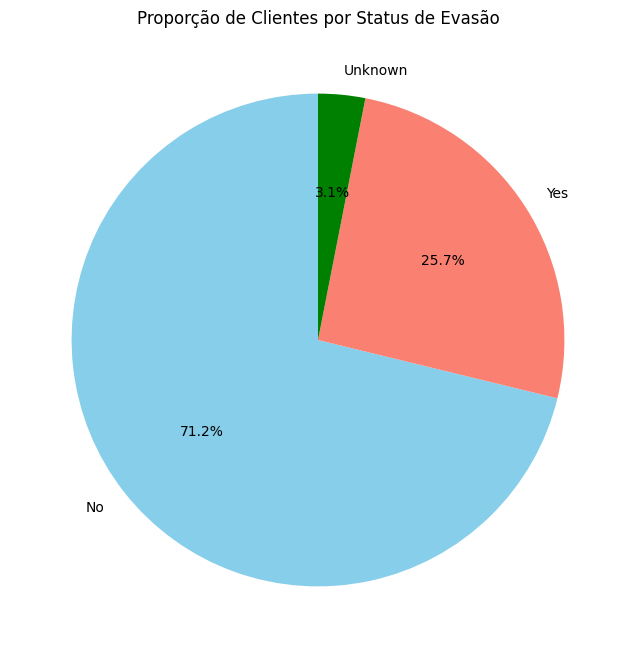

In [ ]:
import matplotlib.pyplot as plt

# A contagem de churn
churn_counts = df_flat['Churn'].value_counts()
print(churn_counts)

# Define a lista de cores na ordem correta
colors = ['skyblue', 'salmon', 'green']
labels = churn_counts.index.tolist()

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporção de Clientes por Status de Evasão')
plt.show()

--- Tabela de Contingência: Churn vs. Gênero ---
gender   Female  Male
Churn                
No         2549  2625
Unknown     104   120
Yes         939   930


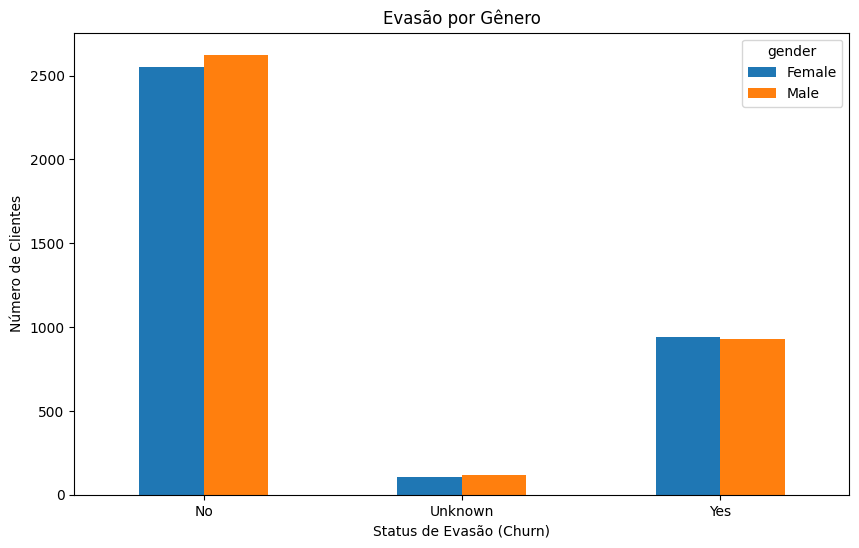

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tabela cruzada entre 'Churn' e 'gender'
churn_gender_crosstab = pd.crosstab(df_flat['Churn'], df_flat['gender'])
print("--- Tabela de Contingência: Churn vs. Gênero ---")
print(churn_gender_crosstab)

# Visualização da evasão por gênero
churn_gender_crosstab.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Evasão por Gênero')
plt.xlabel('Status de Evasão (Churn)')
plt.ylabel('Número de Clientes')
plt.show()


--- Tabela de Contingência: Churn vs. Contrato ---
Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Unknown              130        46        48
Yes                 1655       166        48


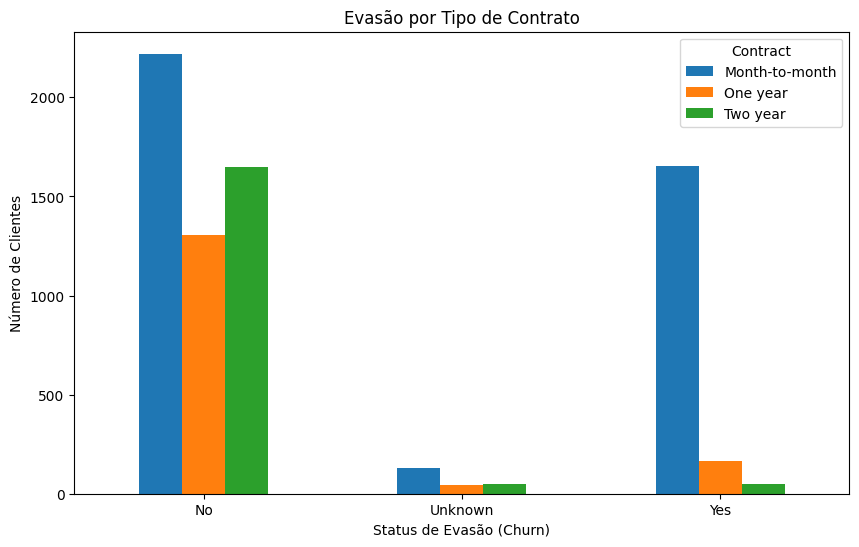

In [ ]:
# Tabela cruzada entre 'Churn' e 'Contract'
churn_contract_crosstab = pd.crosstab(df_flat['Churn'], df_flat['Contract'])
print("\n--- Tabela de Contingência: Churn vs. Contrato ---")
print(churn_contract_crosstab)

# Visualização da evasão por contrato
churn_contract_crosstab.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Status de Evasão (Churn)')
plt.ylabel('Número de Clientes')
plt.show()


--- Tabela de Contingência: Churn vs. Método de Pagamento ---
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Unknown                               45                       46   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Unknown                      80            53  
Yes                        1071           308  


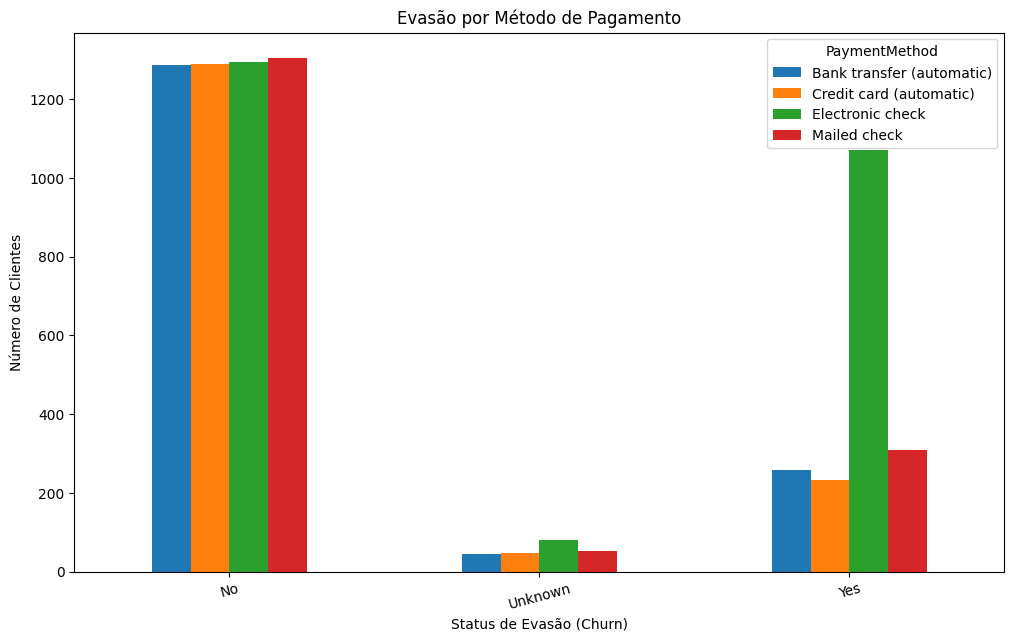

In [ ]:
# Tabela cruzada entre 'Churn' e 'PaymentMethod'
churn_payment_crosstab = pd.crosstab(df_flat['Churn'], df_flat['PaymentMethod'])
print("\n--- Tabela de Contingência: Churn vs. Método de Pagamento ---")
print(churn_payment_crosstab)

# Visualização da evasão por método de pagamento
churn_payment_crosstab.plot(kind='bar', figsize=(12, 7), rot=15)
plt.title('Evasão por Método de Pagamento')
plt.xlabel('Status de Evasão (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

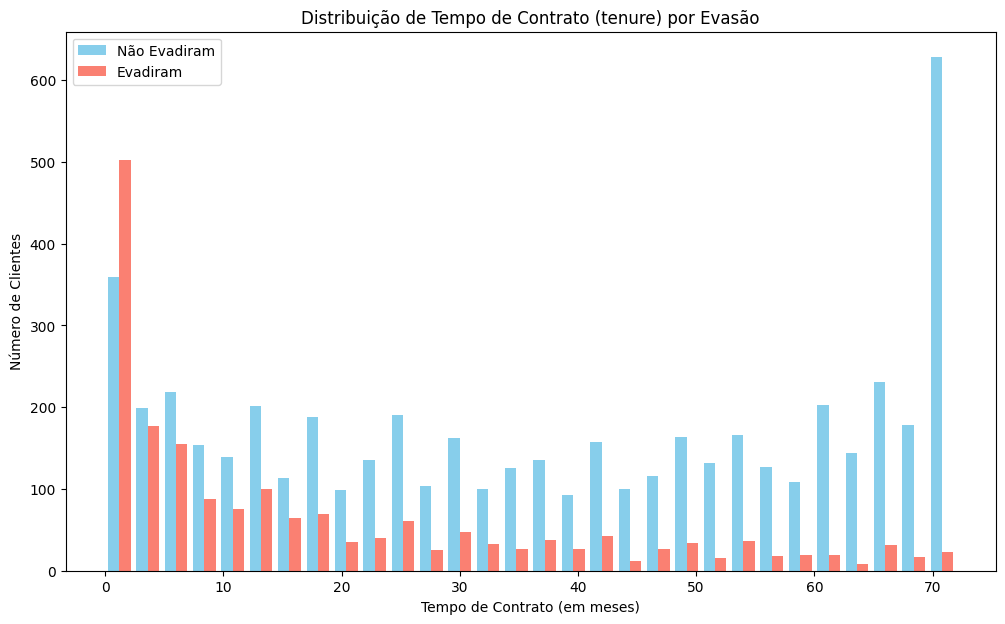

<Figure size 1000x600 with 0 Axes>

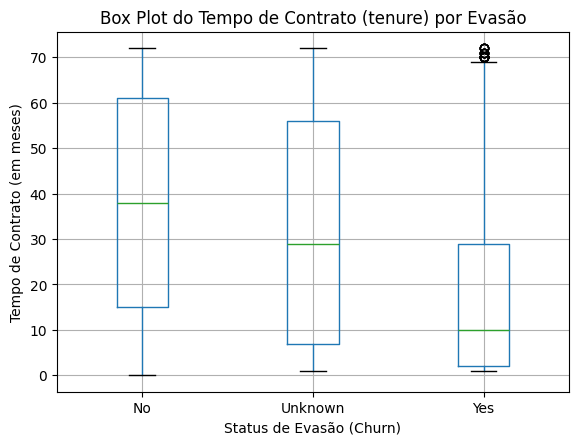

In [ ]:
import matplotlib.pyplot as plt

# Separa o DataFrame em dois grupos: Churn 'Yes' e Churn 'No'
churn_yes = df_flat[df_flat['Churn'] == 'Yes']['tenure']
churn_no = df_flat[df_flat['Churn'] == 'No']['tenure']

plt.figure(figsize=(12, 7))
plt.hist([churn_no, churn_yes], bins=30, color=['skyblue', 'salmon'], label=['Não Evadiram', 'Evadiram'])
plt.title('Distribuição de Tempo de Contrato (tenure) por Evasão')
plt.xlabel('Tempo de Contrato (em meses)')
plt.ylabel('Número de Clientes')
plt.legend()
plt.show()

# Opcional: Box plot para uma visão mais detalhada
plt.figure(figsize=(10, 6))
df_flat.boxplot(column='tenure', by='Churn', grid=True)
plt.title('Box Plot do Tempo de Contrato (tenure) por Evasão')
plt.suptitle('') # Remove o título padrão gerado pelo boxplot
plt.xlabel('Status de Evasão (Churn)')
plt.ylabel('Tempo de Contrato (em meses)')
plt.show()

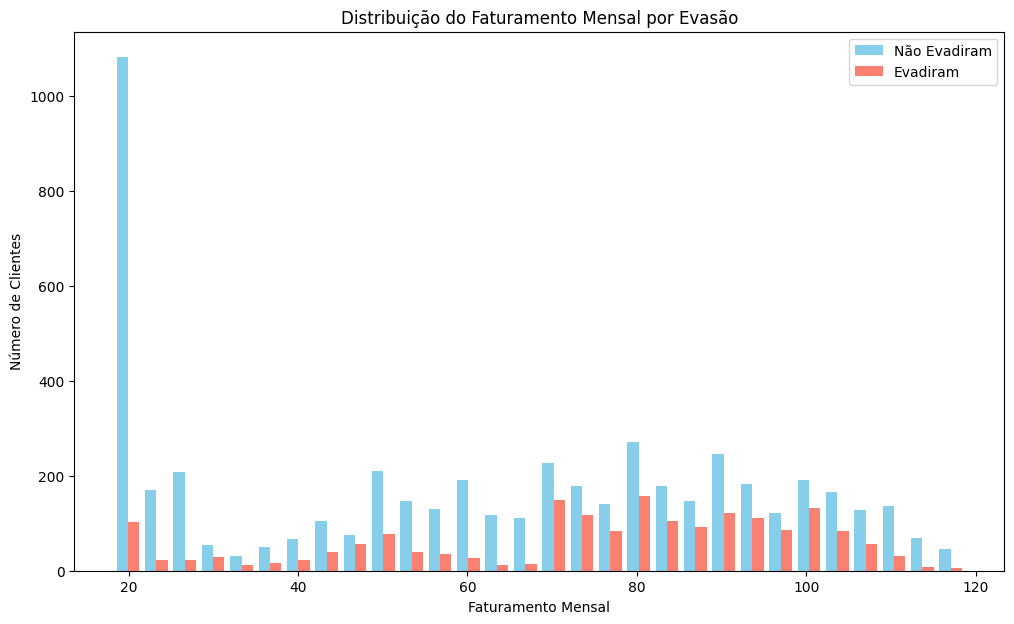

<Figure size 1000x600 with 0 Axes>

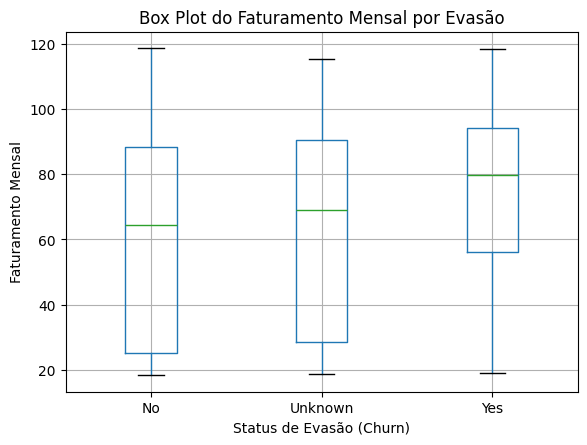

In [ ]:
# Separa o DataFrame em dois grupos: Churn 'Yes' e Churn 'No'
churn_yes = df_flat[df_flat['Churn'] == 'Yes']['Charges.Monthly']
churn_no = df_flat[df_flat['Churn'] == 'No']['Charges.Monthly']

plt.figure(figsize=(12, 7))
plt.hist([churn_no, churn_yes], bins=30, color=['skyblue', 'salmon'], label=['Não Evadiram', 'Evadiram'])
plt.title('Distribuição do Faturamento Mensal por Evasão')
plt.xlabel('Faturamento Mensal')
plt.ylabel('Número de Clientes')
plt.legend()
plt.show()

# Opcional: Box plot
plt.figure(figsize=(10, 6))
df_flat.boxplot(column='Charges.Monthly', by='Churn', grid=True)
plt.title('Box Plot do Faturamento Mensal por Evasão')
plt.suptitle('')
plt.xlabel('Status de Evasão (Churn)')
plt.ylabel('Faturamento Mensal')
plt.show()

#📄Relatorio Final

# 📊 Análise de Evasão de Clientes (Churn)

---

## 1. Introdução

Nesta análise, o **objetivo principal** foi investigar o fenômeno da *evasão de clientes* (**Churn**) e identificar os principais fatores que levam ao cancelamento do serviço.  
A compreensão desses fatores é crucial para que a empresa possa desenvolver **estratégias de retenção eficazes** e reduzir perdas financeiras.

O dataset utilizado contém informações detalhadas sobre a base de clientes, incluindo:

- Dados demográficos
- Serviços contratados
- Faturamento
- Status de evasão de cada cliente

---

## 2. Limpeza e Tratamento de Dados

Antes da análise, o dataset passou por um processo de **limpeza e tratamento** para garantir a qualidade dos dados.

**Principais passos realizados:**
1. **Achatamento das colunas aninhadas**  
   - Colunas como `customer`, `phone`, `internet` e `account` continham dados em formato de dicionário e foram "achatadas" em colunas individuais.

2. **Padronização da coluna Churn**  
   - Valores vazios (`''`) foram substituídos por `Unknown` para garantir consistência.

3. **Criação de `Contas_Diarias`**  
   - Nova coluna para visão mais granular dos gastos dos clientes ao longo do tempo.

> 📊 **Visualização:** A distribuição de clientes por status de evasão foi mostrada em um gráfico de barras, exibindo a proporção de clientes que **permaneceram**, **evadiram** ou tiveram **status desconhecido**.

---

## 3. Análise Exploratória e Recomendações

A análise exploratória revelou **padrões significativos** associados à evasão.  
Abaixo, os principais insights e recomendações:

### 🔹 Evasão por Tipo de Contrato
- Clientes com contratos **"Mês a Mês"** apresentam taxa de evasão **significativamente maior**.

**Recomendação:**  
> Criar campanhas de incentivo para migração para contratos de maior duração, oferecendo **descontos** ou **benefícios exclusivos**.

---

### 🔹 Evasão por Tempo de Contrato (*tenure*)
- A maioria dos clientes que evadem são **novos**, com tempo de serviço consideravelmente menor.

**Recomendação:**  
> Focar em ações de **onboarding** e suporte nos primeiros meses.  
> Implementar programas de acompanhamento e ofertas exclusivas para novos clientes.

---

### 🔹 Evasão por Faturamento Mensal
- Clientes que pagam contas mais altas têm **maior tendência** a cancelar.

**Recomendação:**  
> Avaliar a **competitividade** dos planos de maior valor.  
> Oferecer pacotes de benefícios adicionais ou descontos para clientes de alto custo.

---

## 4. Conclusões e Insights
  Temos 25.7% de clientes em evasão de acordo com o nosso levantamento, sendo o sue gênero irrelevante para dizer se eles se mantém conosco ou não acabamos focando em outros fatores. Chama a atenção o número de contratos do tipo **MENSAL** que perdemos sendo a sua grande maioria da fatia desses contratos que apesar de ser a maioria de nossos clientes se tornou um potencial problema por conta da sua evasão.
  <br>
<div align="center">
  <a href="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/1.png" target="_blank">
  <img src="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/1.png"
       alt="Gráfico de Distribuição de Clientes"
       width="500">
</a>
</div>
<br>
<div align="center">
  <a href="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/3tipocontrato.png" target="_blank">
  <img src="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/3tipocontrato.png"
       alt="Evasão por Tipo de Contrato"
       width="500">
</a>
</div>
<br>

  Um ponto de atenção é a evasão de clientes que realizaram transferência eletrônica que no caso é nomeado de e-check ou Eletronic Check. como vamos ver no gráfico todos os tipos de pagamentos são equivalentes em sua quantidade de permanência do nosso serviço, porém em sua grande maioria a evasão vem do pagamento citado acima, o que pode nos dar um alerta para efetuar alguma ação e entender as motivações dessa evasão.

  <br>
<div align="center">
  <a href="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/4metodopaga.png" target="_blank">
  <img src="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/4metodopaga.png"
       alt="Evasão por Método de Pagamento"
       width="500">
</a>
</div>
<br>
  Outro dado levantado é a evasão pela quantidade de tempo que o cliente tem a assinatura e tivemos outro dado curioso. Em sua grande maioria nossa evasão vem nos primeiros meses de uso, além de notar um crescente aumento recente nesses mesmo tipo de cliente. Uma notícia boa é a quantidade que não evadiu em um processo de contrato de longo prazo. Tendo uma curva crescente de quantidade de usuários conforme a fidelidade em meses aumenta, podendo ser um indicativo de se realizar alguma ação nesse ponto.

<br>
<br>
<div align="center">
  <a href="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/5tempocontrato.png" target="_blank">
  <img src="https://raw.githubusercontent.com/mateusfsrg/challengeTelecomX/refs/heads/main/imagens/5tempocontrato.png"
       alt="Distribuição de tempo de contrato(tenure) por Evasão"
       width="700">
</a>
</div>
<br>




  

## ✅ Conclusão

Com este relatório, a análise está **consolidada** e as visualizações sustentam as **conclusões e recomendações** apresentadas.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o DataFrame já foi carregado como 'df'
# df = pd.read_csv('seu_arquivo.csv')

def clean_and_analyze_churn_data(df):
    """
    Função para limpar dados e analisar churn de clientes
    """
    print("=== ANÁLISE INICIAL DO DATASET ===")
    print(f"Shape original: {df.shape}")
    print(f"Colunas: {list(df.columns)}")
    print("\nPrimeiras 5 linhas:")
    print(df.head())

    # 1. IDENTIFICAÇÃO E REMOÇÃO DE COLUNAS IRRELEVANTES
    print("\n=== LIMPEZA DE COLUNAS ===")

    # Identificar colunas que são identificadores únicos
    colunas_para_remover = []

    # Verificar se customerID é um identificador único
    if 'customerID' in df.columns:
        unique_ratio = df['customerID'].nunique() / len(df)
        print(f"CustomerID - Proporção de valores únicos: {unique_ratio:.2%}")
        if unique_ratio > 0.95:  # Se mais de 95% são únicos, é provável que seja um ID
            colunas_para_remover.append('customerID')
            print("✓ customerID identificado como identificador único - será removido")

    # Verificar outras colunas que podem ser IDs ou não úteis
    for col in df.columns:
        if col not in ['Churn'] and col not in colunas_para_remover:
            unique_ratio = df[col].nunique() / len(df)
            if unique_ratio > 0.95:
                print(f"⚠️  Coluna '{col}' tem {unique_ratio:.2%} valores únicos - pode ser um ID")
                colunas_para_remover.append(col)

    # Remover colunas identificadas
    if colunas_para_remover:
        print(f"\nRemovendo colunas: {colunas_para_remover}")
        df_clean = df.drop(columns=colunas_para_remover)
    else:
        df_clean = df.copy()
        print("Nenhuma coluna removida baseada nos critérios de ID único")

    print(f"Shape após remoção: {df_clean.shape}")
    print(f"Colunas restantes: {list(df_clean.columns)}")

    # 2. ANÁLISE DA VARIÁVEL TARGET (CHURN)
    print("\n=== ANÁLISE DA VARIÁVEL CHURN ===")

    if 'Churn' in df_clean.columns:
        # Verificar valores únicos na coluna Churn
        print("Valores únicos na coluna Churn:")
        print(df_clean['Churn'].value_counts())

        # Calcular proporções
        churn_counts = df_clean['Churn'].value_counts()
        churn_proportions = df_clean['Churn'].value_counts(normalize=True)

        print("\n--- DISTRIBUIÇÃO DE CHURN ---")
        for valor, count in churn_counts.items():
            prop = churn_proportions[valor]
            print(f"{valor}: {count:,} clientes ({prop:.2%})")

        # Verificar desequilíbrio de classes
        print("\n--- ANÁLISE DE DESEQUILÍBRIO ---")
        min_class_prop = churn_proportions.min()
        max_class_prop = churn_proportions.max()
        desequilibrio_ratio = max_class_prop / min_class_prop

        print(f"Proporção da classe minoritária: {min_class_prop:.2%}")
        print(f"Proporção da classe majoritária: {max_class_prop:.2%}")
        print(f"Razão de desequilíbrio: {desequilibrio_ratio:.2f}:1")

        if desequilibrio_ratio > 2:
            print("⚠️  ALERTA: Dataset apresenta desequilíbrio significativo entre classes!")
            print("   Recomendações:")
            print("   - Considerar técnicas de balanceamento (SMOTE, undersampling, oversampling)")
            print("   - Usar métricas adequadas (F1-score, AUC-ROC, Precision-Recall)")
            print("   - Considerar pesos nas classes durante o treinamento do modelo")
        else:
            print("✓ Dataset relativamente balanceado")

    else:
        print("⚠️  Coluna 'Churn' não encontrada no dataset!")

    # 3. INFORMAÇÕES ADICIONAIS SOBRE O DATASET LIMPO
    print("\n=== INFORMAÇÕES DO DATASET LIMPO ===")
    print(f"Total de registros: {len(df_clean):,}")
    print(f"Total de colunas: {len(df_clean.columns)}")

    # Verificar valores nulos
    print("\n--- VALORES NULOS ---")
    null_counts = df_clean.isnull().sum()
    if null_counts.sum() > 0:
        print("Colunas com valores nulos:")
        for col, count in null_counts[null_counts > 0].items():
            print(f"  {col}: {count} ({count/len(df_clean):.2%})")
    else:
        print("✓ Nenhum valor nulo encontrado")

    # Tipos de dados
    print("\n--- TIPOS DE DADOS ---")
    for col, dtype in df_clean.dtypes.items():
        unique_values = df_clean[col].nunique()
        print(f"  {col}: {dtype} ({unique_values} valores únicos)")

    return df_clean, churn_counts, churn_proportions

def create_churn_visualization(df_clean):
    """
    Criar visualização da distribuição de churn
    """
    if 'Churn' not in df_clean.columns:
        print("Coluna 'Churn' não encontrada para visualização")
        return

    # Configurar o plot
    plt.figure(figsize=(12, 5))

    # Gráfico de barras
    plt.subplot(1, 2, 1)
    churn_counts = df_clean['Churn'].value_counts()
    bars = plt.bar(churn_counts.index, churn_counts.values,
                   color=['skyblue', 'lightcoral'])
    plt.title('Distribuição de Churn\n(Valores Absolutos)', fontsize=14, fontweight='bold')
    plt.xlabel('Churn')
    plt.ylabel('Número de Clientes')

    # Adicionar valores nas barras
    for bar, value in zip(bars, churn_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + len(df_clean)*0.01,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')

    # Gráfico de pizza
    plt.subplot(1, 2, 2)
    churn_proportions = df_clean['Churn'].value_counts(normalize=True)
    colors = ['skyblue', 'lightcoral']
    wedges, texts, autotexts = plt.pie(churn_proportions.values,
                                      labels=churn_proportions.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90)
    plt.title('Proporção de Churn', fontsize=14, fontweight='bold')

    # Melhorar formatação do texto
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)

    plt.tight_layout()
    plt.show()